In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import os
from glob2 import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [3]:
dataset = pd.read_json("/content/drive/MyDrive/RDocs/trading-research-main/NSE-Data/Equity/Historical-ohlcv/ADANIENT/ADANIENT-2000-01-01-2023-05-31.json",typ='series')
#dataset = pd.read_json(file_list[0],typ='series')

In [4]:
df = pd.DataFrame(dataset['data'])

In [5]:
df.head()

,open,high,low,close,volume,start_Time
0,6.63,6.72,6.50,6.59,43406.0,2003-09-05 00:00:00
1,6.75,6.81,6.57,6.62,37381.0,2003-09-08 00:00:00
2,6.75,6.87,6.47,6.59,41136.0,2003-09-09 00:00:00
3,6.53,6.68,6.50,6.58,36487.0,2003-09-10 00:00:00
4,6.56,6.75,6.47,6.53,38052.0,2003-09-11 00:00:00


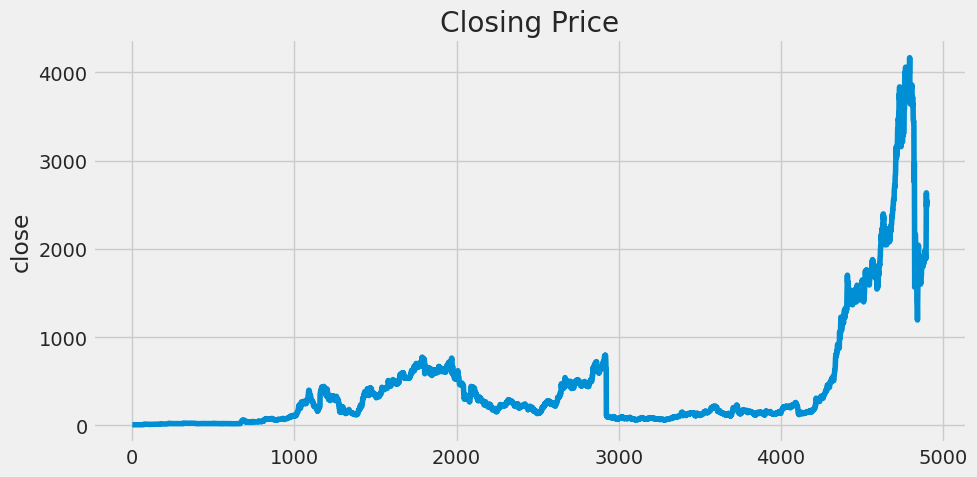

In [22]:
# Let's see a historical view of the closing price
plt.figure(figsize=(10, 5))


df['close'].plot()
plt.ylabel('close')
plt.xlabel(None)
plt.title(f"Closing Price")

plt.tight_layout()

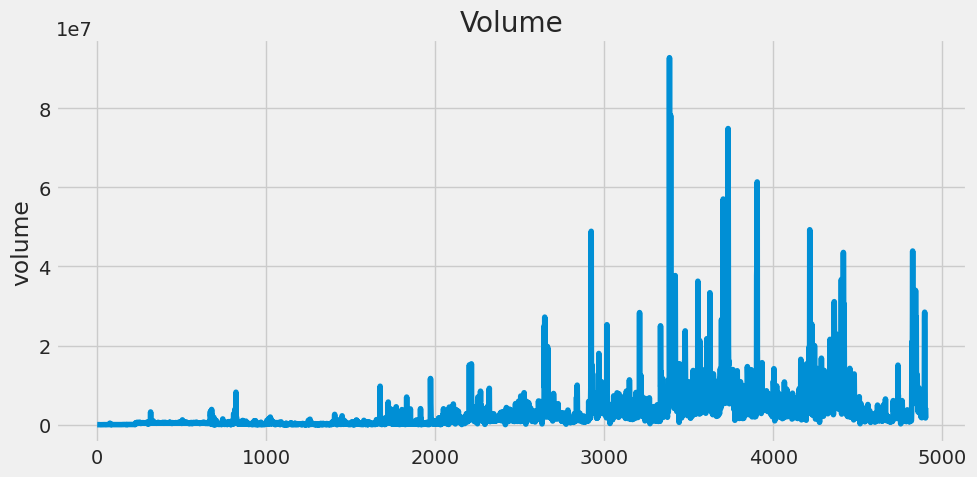

In [21]:
plt.figure(figsize=(10, 5))


df['volume'].plot()
plt.ylabel('volume')
plt.xlabel(None)
plt.title(f"Volume")

plt.tight_layout()

In [24]:
X=df.iloc[:,0:3]
y=df.loc[:,'close']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [27]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=1)

3922/3922 [==============================] - 26s 6ms/step - loss: 238665.8281


In [31]:
predictions = model.predict(X_test)

31/31 [==============================] - 0s 5ms/step


In [34]:
len(y_train)

3922

In [37]:
y

0          6.59
1          6.62
2          6.59
3          6.58
4          6.53
         ...   
4898    2537.45
4899    2544.35
4900    2534.05
4901    2496.45
4902    2493.35
Name: close, Length: 4903, dtype: float64

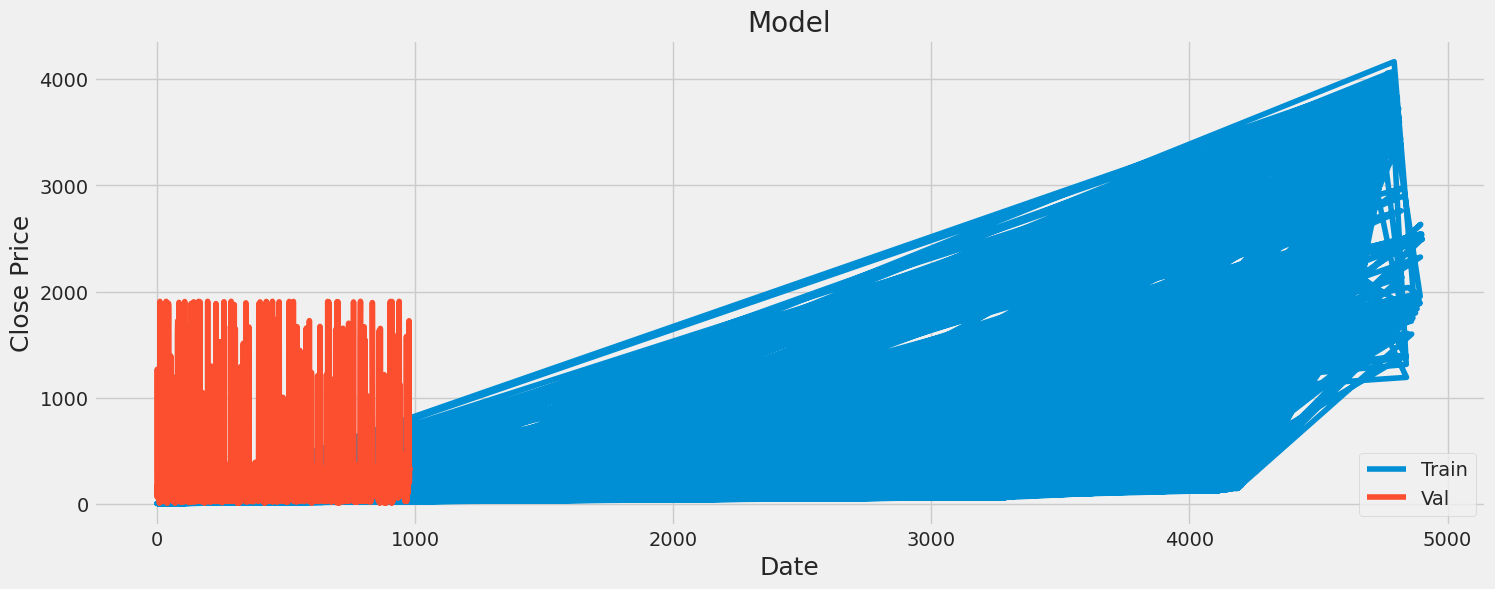

In [40]:
# Plot the data
#train = y[:len(y_train)]
#valid = y[len(y_train):]
#valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(y_train)
plt.plot(predictions)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()
